<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/7-algos-and-data-structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithms & Data Structures

This class, *Algorithms & Data Structures*, introduces the most important computer science topics for machine learning, enabling you to design and deploy computationally efficient data models. 

Through the measured exposition of theory paired with interactive examples, you’ll develop a working understanding of all of the essential data structures across the list, dictionary, tree, and graph families. You’ll also learn the key algorithms for working with these structures, including those for searching, sorting, hashing, and traversing data. 

The content covered in this class is itself foundational for the *Optimization* class of the *Machine Learning Foundations* series.

Over the course of studying this topic, you'll: 

* Use “Big O” notation to characterize the time efficiency and space efficiency of a given algorithm, enabling you to select or devise the most sensible approach for tackling a particular machine learning problem with the hardware resources available to you.
* Get acquainted with the entire range of the most widely-used Python data structures, including list-, dictionary-, tree-, and graph-based structures. 
* Develop an understanding of all of the essential algorithms for working with data, including those for searching, sorting, hashing, and traversing. 


**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Segment 1: Introduction to Data Structures and Algorithms*
* A Brief History of Data and Data Structures
* A Brief History of Algorithms
* “Big O” Notation for Time and Space Complexity 
 
*Segment 2: Lists and Dictionaries*
* List-Based Data Structures: Arrays, Linked Lists, Stacks, Queues, and Deques 
* Searching and Sorting: Binary, Bubble, Merge, and Quick
* Dictionaries: Sets and Maps
* Hashing: Hash Tables and Hash Maps

*Segment 3: Trees and Graphs*
* Trees: Binary Search, Heaps, and Self-Balancing
* Graphs: Terminology, Coded Representations, Properties, Traversals, and Paths
* Resources for Further Study of Data Structures & Algorithms


# Segment 1: Intro to Data Structures & Algorithms

### "Big O" Notation

In [1]:
import numpy as np
import tensorflow as tf
import torch
import pandas as pd
import seaborn as sns
import time

#### Constant Time

In [2]:
def take_first(my_list):
    return my_list[0]

In [3]:
short_list = [13, 25, 42]

In [4]:
tic = time.process_time() # if using a version of Python older than 3.3, you can use time.clock() here
first = take_first(short_list)
toc = time.process_time()

In [5]:
first

13

In [6]:
toc-tic

5.486699999979194e-05

In [7]:
long_list = [42] * 10**8 # one hundred million items

In [8]:
len(long_list)

100000000

In [9]:
tic = time.process_time()
first = take_first(long_list)
toc = time.process_time()

In [10]:
toc-tic

0.0001076649999998125

In [11]:
list_lengths = [10**l for l in range(1, 8)]
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [12]:
constant_times = []

for l in list_lengths:
    lst = [42]*l
  
    tic = time.process_time()
    x = take_first(lst)
    toc = time.process_time()
  
    constant_times.append(toc-tic)

In [13]:
import pandas as pd

In [14]:
constant_df = pd.DataFrame(list(zip(list_lengths, constant_times)), columns=['n', 'time'])
constant_df

,n,time
0,10,3.658000e-06
1,100,8.720000e-07
2,1000,8.770000e-07
3,10000,1.197000e-06
4,100000,2.668000e-06
5,1000000,3.013000e-06
6,10000000,2.659000e-04


#### Linear Time

In [15]:
def find_max(my_list):
    max_value = my_list[0]
    for i in range(len(my_list)):
        if my_list[i] > max_value:
            max_value = my_list[i]
    return max_value

In [16]:
tic = time.process_time()
largest = find_max(short_list)
toc = time.process_time()

In [17]:
toc-tic

7.361599999988755e-05

In [18]:
largest

42

In [19]:
tic = time.process_time()
largest = find_max(long_list)
toc = time.process_time()

In [20]:
toc-tic

4.219264809

In [21]:
largest

42

In [22]:
linear_times = []

for l in list_lengths:
    lst = [42]*l
  
    tic = time.process_time()
    x = find_max(lst)
    toc = time.process_time()
  
    linear_times.append(toc-tic)

In [24]:
linear_df = pd.DataFrame(list(zip(list_lengths, linear_times)), columns=['n', 'time'])
linear_df

,n,time
0,10,0.000132
1,100,0.000005
2,1000,0.000042
3,10000,0.000478
4,100000,0.004356
5,1000000,0.045727
6,10000000,0.411989


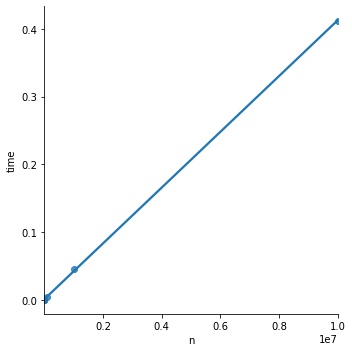

In [25]:
_ = sns.lmplot(x='n', y='time', data=linear_df, ci=None) # linear model (regression) plot

#### Polynomial Time

In [26]:
def element_multiplier(my_list): 
    for i in range(len(my_list)):
        for j in range(len(my_list)):
            x = my_list[i] * my_list[j]

In [27]:
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [28]:
list_lengths[:4] # compute time gets annoyingly long from list_lengths[5] onward

[10, 100, 1000, 10000]

In [29]:
granular_list_lengths = list_lengths[:4] + [50, 500, 5000]
granular_list_lengths.sort()
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [30]:
poly_times = []

for l in granular_list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = element_multiplier(lst)
    toc = time.process_time()

    poly_times.append(toc-tic)

In [31]:
poly_df = pd.DataFrame(list(zip(granular_list_lengths, poly_times)), columns=['n', 'time'])
poly_df

,n,time
0,10,0.000072
1,50,0.000188
2,100,0.000710
3,500,0.019274
4,1000,0.062702
5,5000,1.596867
6,10000,6.691346


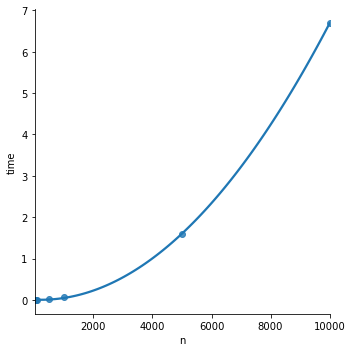

In [32]:
_ = sns.lmplot(x='n', y='time', data=poly_df, ci=None, order=2)

**In Big O notation**:

* Constant: O(1)
* Linear: O($n$)
* Polynomial: O($n^2$)

**Other common runtimes**:

* Logarithmic: O(log $n$)
* Exponential: O($2^n$)
* O($n$ log $n$)
* O($n!$)

**Return to slides here.**

## Segment 2: Lists and Dictionaries

### List-Based Data Structures

#### Lists

In [33]:
t = [25, 2, 5]
t

[25, 2, 5]

Lists in Python are **extensible** by default: 

In [34]:
t.append(26)
t

[25, 2, 5, 26]

In [35]:
t[2]

5

Cannot apply mathematical operators, e.g., try uncommenting: 

In [36]:
# t/2

**Return to slides here.**

#### Arrays

In [37]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [38]:
x[2]

5

In [39]:
x/2.

array([12.5,  1. ,  2.5])

In [40]:
y = torch.tensor([[25, 2, 5], [26, 1, 4]])
y

tensor([[25,  2,  5],
        [26,  1,  4]])

In [41]:
y[0, 2]

tensor(5)

In [42]:
y/2.

tensor([[12.5000,  1.0000,  2.5000],
        [13.0000,  0.5000,  2.0000]])

In [43]:
z = tf.Variable([[[0, 1], [2, 3]], [[25, 26], [7, 9]]], dtype=tf.float16)
z

<tf.Variable 'Variable:0' shape=(2, 2, 2) dtype=float16, numpy=
array([[[ 0.,  1.],
        [ 2.,  3.]],

       [[25., 26.],
        [ 7.,  9.]]], dtype=float16)>

In [44]:
z[1, 0, 0]

<tf.Tensor: shape=(), dtype=float16, numpy=25.0>

In [45]:
z/2.

<tf.Tensor: shape=(2, 2, 2), dtype=float16, numpy=
array([[[ 0. ,  0.5],
        [ 1. ,  1.5]],

       [[12.5, 13. ],
        [ 3.5,  4.5]]], dtype=float16)>

Arrays in Python are also typically extensible by default.

Note that it's very efficient (O(1)) to append items to end of list...

In [46]:
np.append(x, 26)

array([25,  2,  5, 26])

...but time inefficient to add at start or middle of long list as later items will need to be shifted to later in list. Worst case is insert at beginning of list, which has O($n$) complexity. 

Note that as well as appending, accessing an array element by index or finding the array's length are O(1).

**Return to slides here.**

#### Stacks

Can be implemented in Python with lists: 

In [47]:
s = []
s

[]

In [48]:
s.append('five_of_diamonds') # push
s

['five_of_diamonds']

In [49]:
s.append('queen_of_hearts')
s

['five_of_diamonds', 'queen_of_hearts']

In [50]:
s.append('ace_of_spades')
s

['five_of_diamonds', 'queen_of_hearts', 'ace_of_spades']

In [51]:
s.pop()

'ace_of_spades'

In [52]:
s

['five_of_diamonds', 'queen_of_hearts']

**Return to slides here.**

### Searching and Sorting

Topics in this section: 
* Binary search
* Bubble sort
* Merge sort
* Quick sort

#### Binary Search

Let's say we have an array, `b`: 

In [53]:
b = np.array([25, 2, 5, 14, 22, 11, 96, 1, 101])
b

array([ 25,   2,   5,  14,  22,  11,  96,   1, 101])

Under normal circumstances, the only way to search for a value (e.g., `25`) is to search element by element. In the worse-case, this has O($n$) time complexity (e.g., if we were to search `b` for `25` from its end).

If `b` already happens to be sorted, however...

In [54]:
b.sort() # FYI: uses quick sort
b

array([  1,   2,   5,  11,  14,  22,  25,  96, 101])

...we can use the **binary search** algorithm, which has O(log $n$) time complexity: 

* Start at the midpoint (`b` is nine elements long, so midpoint is 5th: `14`).
* Since `25` is larger than `14`, we need only search the top half of `b`...
* So we find the midpoint between the 5th element and the 9th, which is the 7th, and which happens to be `25`. 
* Done! And in only two steps instead of seven (if we were to search elementwise from first onward).
* If we were searching for `22`, then our next search would be halfway between 5th and 7th elements, which is 6th element and voilà!
* With our nine-element array, worst case is four steps (for `1` or `101`) to find any value (or determine value *isn't* in array).

(Note: called *binary* because at each step we either search upward or downward.)

Doubling $n$ results in only one extra step in worst case: 
* One step with array of length 1($= 2^0$)
* Two steps with length 2($= 2^1$) up to length 3
* Three steps with $n = 4 (= 2^2$) up to $n = 7$
* Four steps with $n = 8 (= 2^3$) up to $n = 15$
* Five steps with $n = 16 (= 2^4$) up to $n = 31$

Hence O(log $n$) where, as is typical in CS, we use $\text{log}_2$ (because of binary bits and frequently doubling/halving quantities). E.g.: 

In [55]:
np.log2(4) + 1

3.0

In [56]:
np.log2(8) + 1

4.0

In [57]:
np.log2(16) + 1

5.0

Recall that we retain only the dominant term, so O(log $n$ + 1) becomes O(log $n$).

Here's an implementation of binary search, for your reference, that *iterates* over binary search steps with a `while` loop: 

In [58]:
def binary_search(array, value):
    
    low = 0
    high = len(array)-1
    
    while low <= high:
        midpoint = (low + high) // 2 # rounds down to nearest integer after division
        if value < array[midpoint]:
            high = midpoint-1
        elif value > array[midpoint]:
            low = midpoint+1
        else:
            return midpoint
    return -1

In [59]:
binary_search(b, 25)

6

In [60]:
binary_search(b, 255)

-1

Alternatively, you could implement binary search with *recursion* instead of iteration: 

In [61]:
def recursive_binary_search(array, value, low, high):
    
    if high >= low:
        
        midpoint = (low + high) // 2
        
        if array[midpoint] == value:
            return midpoint
        elif array[midpoint] > value:
            return recursive_binary_search(array, value, low, midpoint-1)
        else:
            return recursive_binary_search(array, value, midpoint+1, high)
    else:
        return -1

In [62]:
recursive_binary_search(b, 25, 0, len(b)-1)

6

In [63]:
recursive_binary_search(b, 255, 0, len(b)-1)

-1

#### Bubble Sort

To sort (e.g., from smallest to largest value), the most naïve (and computationally complex) approach would be to compare a given element with all other elements.

A common naïve implementation is the **bubble sort**, which allows the largest values to gradually "bubble up" toward the "top" (typically the end) of the array:

In [71]:
def bubble_sort(array):
    n = len(array)
    
    for i in range(n-1):
        for j in range(0, n-1): # could be n-i-1 as, e.g., top value is guaranteed to have bubbled up in 1st iteration
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
                
    return array

In [72]:
b = np.array([25, 2, 5, 14, 22, 11, 96, 1, 101])
b

array([ 25,   2,   5,  14,  22,  11,  96,   1, 101])

In [73]:
bubble_sort(b)

array([  1,   2,   5,  11,  14,  22,  25,  96, 101])

* During each iteration, we make $n-1$ comparisons 
* A total of $n-1$ iterations need to be made

$$ (n-1)(n-1) = n^2 -2n + 1 $$

Since we drop all terms but the dominant one, this leaves us with O($n^2$) time complexity for the worst case and the average case. (For best case, it's O($n$) because array would already be sorted.)

In contrast, as is typical in algos, there is a time- vs memory-complexity trade-off: Memory complexity is constant, O(1).